### Based on plot_distances.py: Data from avg_distance_data/*.json

In [8]:
# Imports
# %matplotlib inline
import json
import numpy as np
import plotly.plotly as py
import matplotlib as mpl
from matplotlib import cycler
# mpl.use('Agg')
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import os
import glob2
import re
import matplotlib.gridspec as gridspec
import os

In [206]:
# ############################# STYLESHEET ###############################

plt.style.use('seaborn-white')
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.labelweight'] = 'normal'
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 14
plt.rcParams['lines.linewidth'] = 1
params = {"ytick.color" : "#000000",
          "xtick.color" : "#000000",
          "axes.labelcolor" : "#000000",
          "axes.edgecolor" : "#000000",
          "text.color": "#000000"}
plt.rcParams.update(params)

In [75]:
def standardize_filenames(fname):
    # fname = "Q0.15_W0.0005_D0.5_T0.005_wb1.json"
    split_list = fname.split("_")

    new_name = ""
    for item in split_list:
        if "Q" in item:
            new_name += item + "_"
        elif "W" in item and len(item) < 7:
            new_length = 7 - len(item)
            new_name += item + "0"*new_length + "_"

        elif "D" in item and len(item) < 6:
            new_length = 6 - len(item)
            new_name += item + "0"*new_length + "_"

        elif "T" in item and len(item) < 7:
            new_length = 7 - len(item)
            new_name += item + "0"*new_length + "_"
        elif "wb" in item:
            new_name += item
        else:
            new_name += item + "_"
        
    return new_name

In [98]:
path = '/Users/dieumynguyen/Desktop/Projects/bee_communication/step2_get_avg_distances/avg_distance_data'
files = os.listdir(path)
for file in files:
    os.rename(os.path.join(path, file), os.path.join(path, standardize_filenames(file)))

In [177]:
reps_list = list(map(lambda x : x.split("/")[-1], glob2.glob("avg_distance_data/*T0.005*.json")))
reps_list = reps_list[::-1]
updated_reps_list = sorted(reps_list, key = lambda x: (x.split("_")[1], x[2]))[::-1]


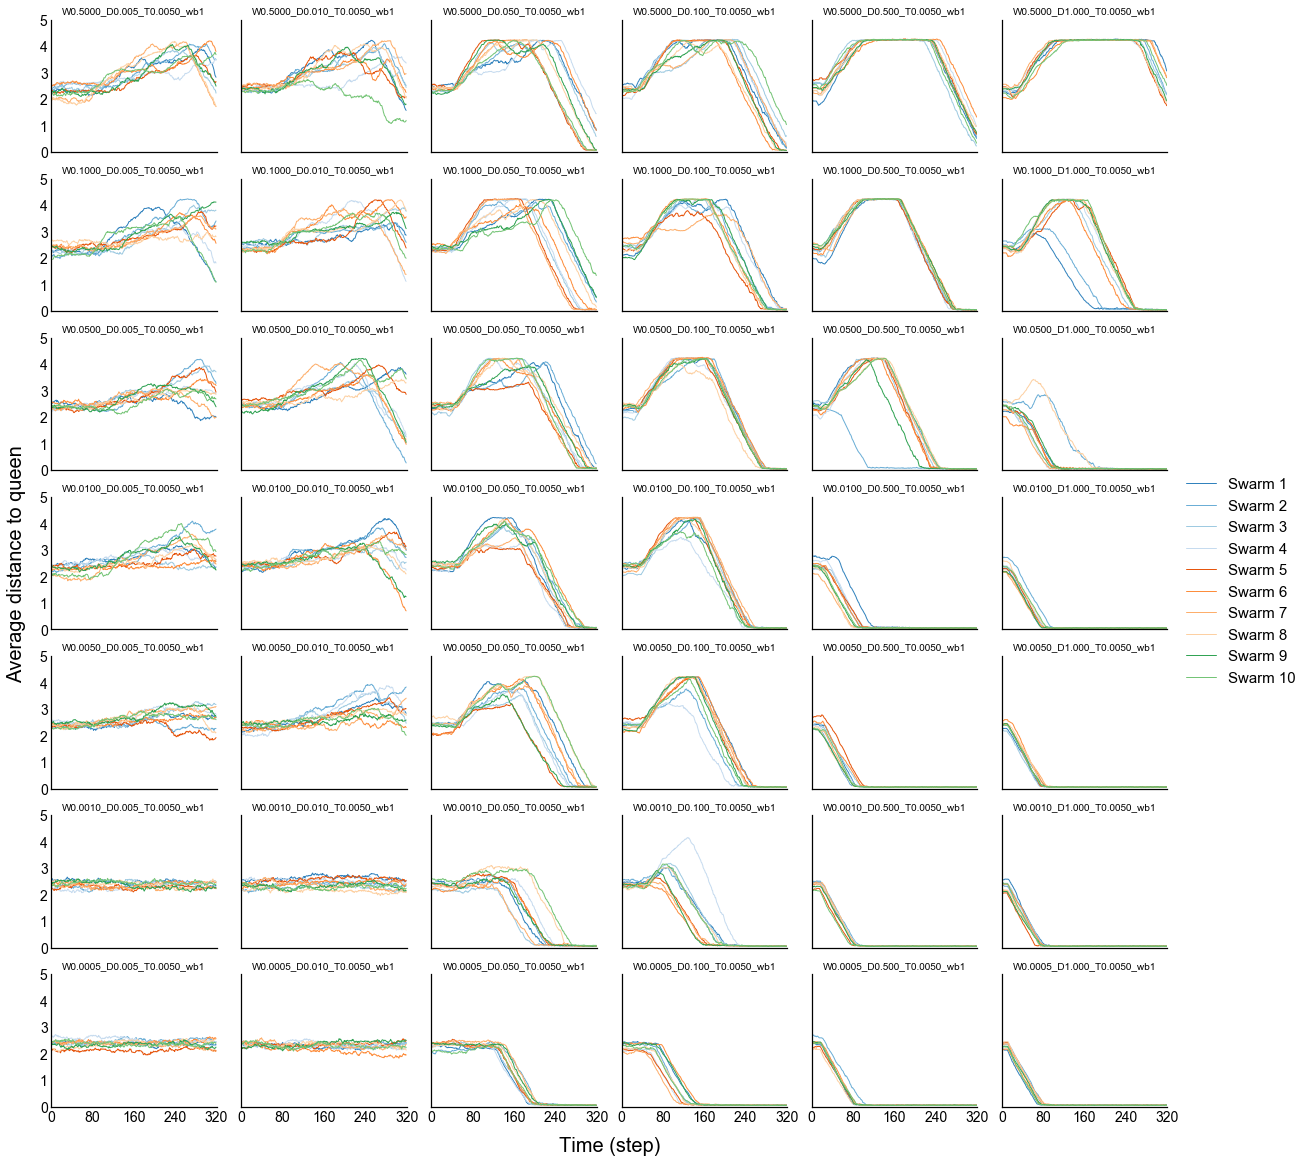

In [208]:
fig, axes = plt.subplots(7, 6, sharex=True, sharey=True, figsize=(20,20))

for j, ax in enumerate(axes.flatten()):
    with open("avg_distance_data/" + updated_reps_list[j], "r") as f:
        data = json.load(f)
    fname = f.name[24:-5]
    
    colormap = mpl.cm.tab20c.colors
    for i, d in enumerate(data):
        if i < 10:
            ax.plot(d, label='Swarm {}'.format(i+1), color=colormap[i])
            
            ax.xaxis.set_major_locator(plt.MaxNLocator(4))
            ax.yaxis.set_major_locator(plt.MaxNLocator(5))
            
            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)
    
            plt.xlim(0, 320)
            plt.ylim(0, 5)
            ax.set_title('{}'.format(fname), fontsize=10)
            
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc=7, fontsize=15, borderpad=0.5)

ax = fig.add_subplot(111, frameon=False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('Time (step)', labelpad=30, fontsize=20) # Use argument `labelpad` to move label downwards.
ax.set_ylabel('Average distance to queen', labelpad=25, fontsize=20)

fig.subplots_adjust(wspace=0.15, hspace=0.2)

plt.savefig("/Users/dieumynguyen/Desktop/Projects/bee_communication/figures/distance_to_queen/distance_to_queen_T0.005.pdf", transparent=True)
plt.show()
